# Assignment 3

### 1.⁠ ⁠Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

Matplotlib is building the font cache; this may take a moment.


In [ ]:
temp = df.copy()

In [7]:
df = temp.copy()

In [8]:
df

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
...,...,...,...,...,...,...,...,...,...,...,...,...
16052,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16053,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16054,06/16/2018 04:00:00 PM,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16055,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [9]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['hour'] = df['hour_beginning'].dt.hour
df['month'] = df['hour_beginning'].dt.month
df['date'] = df['hour_beginning'].dt.date
df['day_name'] = df['hour_beginning'].dt.day_name()

/var/folders/2r/xs5nwh555s3c32mwbkqb223c0000gn/T/ipykernel_56016/3113014875.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


In [12]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_weekdays = df[df['day_name'].isin(weekdays)]
df_weekdays_grouped = df_weekdays.groupby('day_name')['Pedestrians'].sum()
df_weekdays_grouped = df_weekdays_grouped.reindex(weekdays)

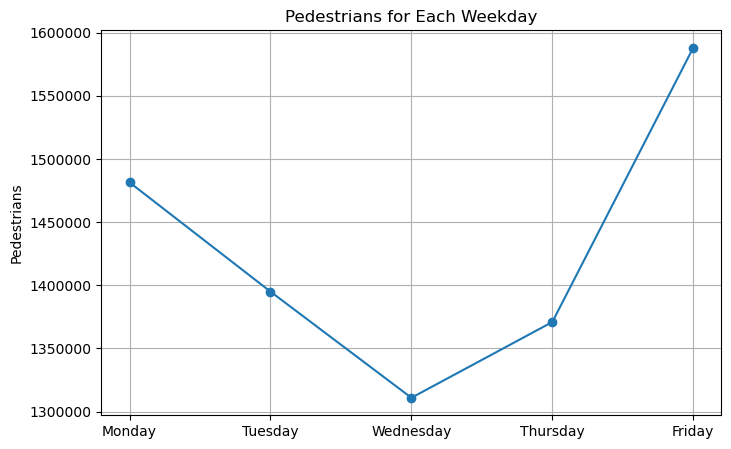

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(df_weekdays_grouped.index, df_weekdays_grouped.values, marker='o', linestyle='-')

plt.ylabel('Pedestrians')
plt.title('Pedestrians for Each Weekday')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

### 2. ⁠Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

-This question requires you to show the relationship between a numerical feature(Pedestrians) and a non-numerical feature(Weather Summary). In such instances we use Encoding. Each weather condition can be encoded as numbers( 0,1,2..). This technique is called One-hot encoding.

-Correlation matrices may not always be the most suitable visualization method for relationships involving categorical data points, nonetheless this was given as a question to help you understand the concept better.

In [21]:
df_2019 = df[df['hour_beginning'].dt.year == 2019]
df_encoded = pd.get_dummies(df_2019, columns=['weather_summary'])
df_encoded

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,temperature,precipitation,lat,long,events,...,weather_summary_clear-day,weather_summary_clear-night,weather_summary_cloudy,weather_summary_fog,weather_summary_partly-cloudy-day,weather_summary_partly-cloudy-night,weather_summary_rain,weather_summary_sleet,weather_summary_snow,weather_summary_wind
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,40.708164,-73.999509,NaN,...,False,False,False,False,False,False,False,False,False,False
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,42.0,0.0005,40.708164,-73.999509,NaN,...,False,False,True,False,False,False,False,False,False,False
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,42.0,0.0004,40.708164,-73.999509,NaN,...,False,False,True,False,False,False,False,False,False,False
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,42.0,0.0036,40.708164,-73.999509,NaN,...,False,False,True,False,False,False,False,False,False,False
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,36.0,0.0000,40.708164,-73.999509,NaN,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,2019-02-10 12:00:00,Brooklyn Bridge,1388,623,765,31.0,0.0000,40.708164,-73.999509,NaN,...,True,False,False,False,False,False,False,False,False,False
8757,2019-11-10 08:00:00,Brooklyn Bridge,305,168,137,39.0,0.0000,40.708164,-73.999509,NaN,...,False,False,False,False,True,False,False,False,False,False
8758,2019-11-07 01:00:00,Brooklyn Bridge,0,0,0,43.0,0.0000,40.708164,-73.999509,NaN,...,False,True,False,False,False,False,False,False,False,False
8759,2019-04-26 11:00:00,Brooklyn Bridge,1437,613,824,55.0,0.0000,40.708164,-73.999509,NaN,...,False,False,True,False,False,False,False,False,False,False


In [23]:
weather_columns = ['Pedestrians'] + [col for col in df_encoded.columns if col.startswith('weather_summary_')]
df_weather = df_encoded[weather_columns]
correlation_matrix = df_weather.corr()
correlation_matrix

,Pedestrians,weather_summary_clear-day,weather_summary_clear-night,weather_summary_cloudy,weather_summary_fog,weather_summary_partly-cloudy-day,weather_summary_partly-cloudy-night,weather_summary_rain,weather_summary_sleet,weather_summary_snow,weather_summary_wind
Pedestrians,1.000000,0.339758,-0.377297,-0.081255,-0.026457,0.497867,-0.282081,-0.138581,-0.017091,-0.034052,-0.000170
weather_summary_clear-day,0.339758,1.000000,-0.227660,-0.224004,-0.022002,-0.220884,-0.175456,-0.119645,-0.013257,-0.028943,-0.009372
weather_summary_clear-night,-0.377297,-0.227660,1.000000,-0.265198,-0.026048,-0.261504,-0.207722,-0.141648,-0.015695,-0.034266,-0.011096
weather_summary_cloudy,-0.081255,-0.224004,-0.265198,1.000000,-0.025630,-0.257304,-0.204386,-0.139373,-0.015443,-0.033715,-0.010917
weather_summary_fog,-0.026457,-0.022002,-0.026048,-0.025630,1.000000,-0.025273,-0.020075,-0.013690,-0.001517,-0.003312,-0.001072
weather_summary_partly-cloudy-day,0.497867,-0.220884,-0.261504,-0.257304,-0.025273,1.000000,-0.201539,-0.137432,-0.015228,-0.033246,-0.010765
weather_summary_partly-cloudy-night,-0.282081,-0.175456,-0.207722,-0.204386,-0.020075,-0.201539,1.000000,-0.109167,-0.012096,-0.026408,-0.008551
weather_summary_rain,-0.138581,-0.119645,-0.141648,-0.139373,-0.013690,-0.137432,-0.109167,1.000000,-0.008249,-0.018008,-0.005831
weather_summary_sleet,-0.017091,-0.013257,-0.015695,-0.015443,-0.001517,-0.015228,-0.012096,-0.008249,1.000000,-0.001995,-0.000646
weather_summary_snow,-0.034052,-0.028943,-0.034266,-0.033715,-0.003312,-0.033246,-0.026408,-0.018008,-0.001995,1.000000,-0.001411


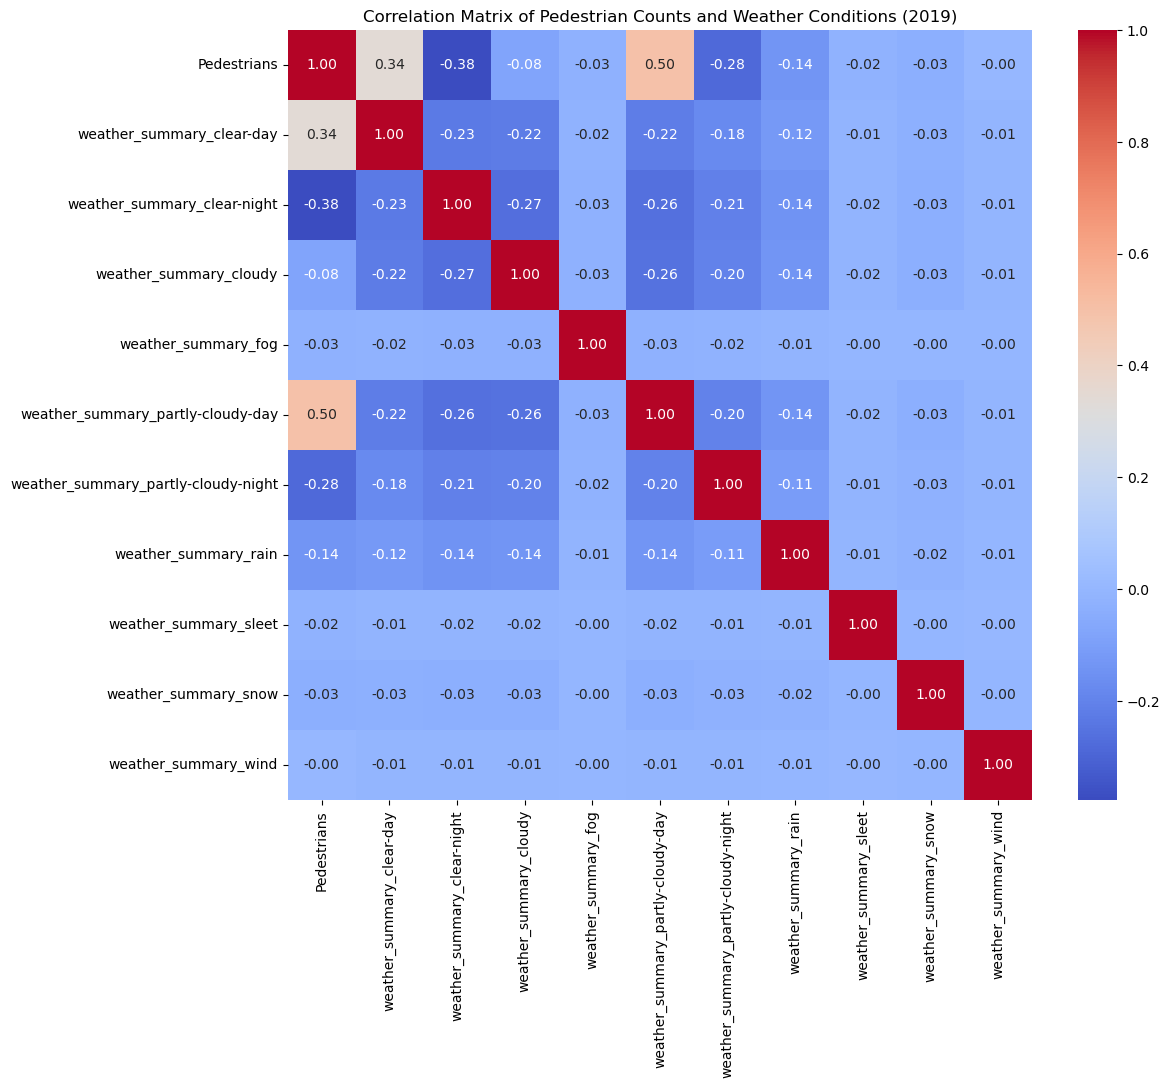

In [24]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pedestrian Counts and Weather Conditions (2019)')
plt.show()

### 3.⁠ ⁠Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

In [25]:
df

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,4,2019-04-30,Tuesday
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",22,12,2019-12-31,Tuesday
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",23,12,2019-12-31,Tuesday
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",21,12,2019-12-31,Tuesday
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,4,2019-04-01,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16052,2018-06-22 04:00:00,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,6,2018-06-22,Friday
16053,2018-07-19 06:00:00,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",6,7,2018-07-19,Thursday
16054,2018-06-16 16:00:00,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",16,6,2018-06-16,Saturday
16055,2018-07-24 18:00:00,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",18,7,2018-07-24,Tuesday


In [26]:
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [27]:
df['time_of_day'] = df['hour'].apply(categorize_time)
time_of_day_counts = df.groupby('time_of_day')['Pedestrians'].sum().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])
time_of_day_counts

time_of_day
Morning      2480582
Afternoon    5852025
Evening      2432145
Night         268114
Name: Pedestrians, dtype: int64

/var/folders/2r/xs5nwh555s3c32mwbkqb223c0000gn/T/ipykernel_56016/2459675623.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_of_day_counts.index, y=time_of_day_counts.values, palette="coolwarm")


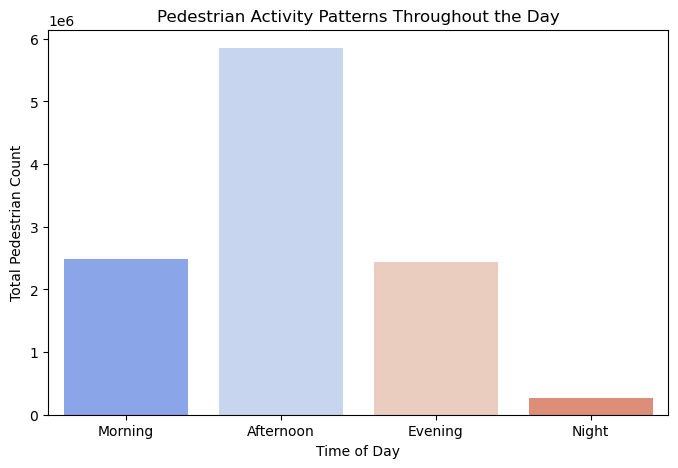

In [28]:
plt.figure(figsize=(8, 5))
sns.barplot(x=time_of_day_counts.index, y=time_of_day_counts.values, palette="coolwarm")
plt.xlabel('Time of Day')
plt.ylabel('Total Pedestrian Count')
plt.title('Pedestrian Activity Patterns Throughout the Day')
plt.show()